In [112]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

## Import libraries

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
import pylab as pl
from IPython import display



## Dataset description

In [114]:
print(load_breast_cancer()['DESCR'])


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Load dataset

In [115]:

data = load_breast_cancer(return_X_y=True, as_frame=True)

X = data[0].to_numpy()
y = data[1].values



## Split data into train and test

In [116]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Normalize data

In [117]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Custom functions

In [118]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)    
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


## Train model

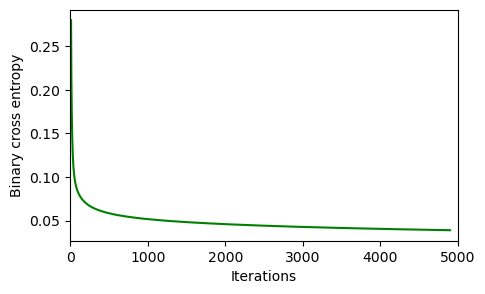

In [119]:
num_iterations = 5000
eta = 0.001

X_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

np.random.seed(0)
W = np.random.randn(X_bias.shape[1])

fig, ax = plt.subplots(1, 1, figsize=(5, 3))

loss_history = []
plot_skip = 10
for i in range(num_iterations):
    y_pred = sigmoid(np.dot(X_bias, W))
    loss_history.append(binary_cross_entropy(y_train, y_pred))
    error = (y_pred-y_train)
    gradient = np.dot(X_bias.T, error)
    W -= eta * gradient
    if i % 100 == 0 and i > plot_skip-1:
        ax.cla() 
        ax.plot(range(plot_skip, len(loss_history)), loss_history[plot_skip:], color='green', label='Mean Squared Error')
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Binary cross entropy')
        ax.set_xlim(0, num_iterations)
        display.clear_output(wait=True)
        display.display(pl.gcf())
        time.sleep(0.1)

display.clear_output(wait=True)
plt.close(fig)


## Predict on test data

In [120]:
X_test_ = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
y_pred_test = sigmoid(np.dot(X_test_, W))


## Compute accuracy of prediction

In [121]:
y_pred_test_binary = (y_pred_test >= 0.5).astype(int)
accuracy_score(y_test, y_pred_test_binary)


0.9736842105263158